In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import hyperiax
from hyperiax.tree.topology import symmetric_topology, asymmetric_topology, read_tree
from hyperiax.tree import HypTree
from hyperiax.plotting import plot_tree
import jax
from jax import numpy as jnp

# Creating the Tree

First, we initialize the tree. Importantly there are 2 concepts related to trees in hyperiax that you should familiarize yourself with. We call the two concepts a `topology` and a `HypTree`. The topology is simply a connection of nodes that save the relations among eacother. At each node, you can inspect its `node.parent` or `node.children`. However, these nodes never contain any data themselves, except for some plotting utility like names etc. 

The `HypTree` class takes a topology, and does all the work in both storing data that fits the topology, and precomputing a series of indices that is needed for the execution engine to run on the tree. It stores the values from each

Lets first see how we can create and plot a simple topology

``hyperiax.tree.topology.asymmetric_topology(depth)``

``hyperiax.tree.topology.symmetric_topology(h,branching)``


builds a symmetric tree, with h depth, and branching
note the tree does not include a length of the branches

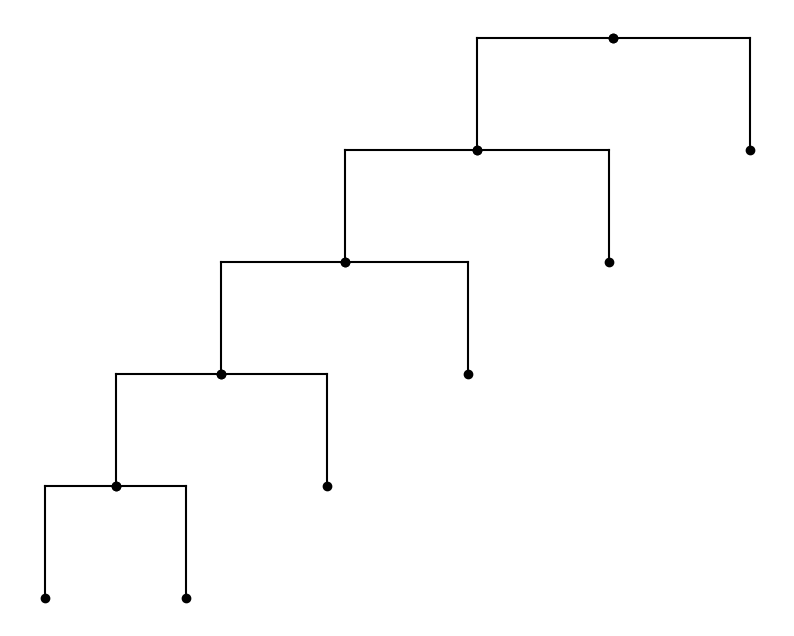

In [9]:

topology = hyperiax.tree.topology.asymmetric_topology(5)
tree = HypTree(topology)    

plot_tree(tree)

## Add names 

It is also possible to add names to the tree. 

The names can be stores in the attribut "node.name"


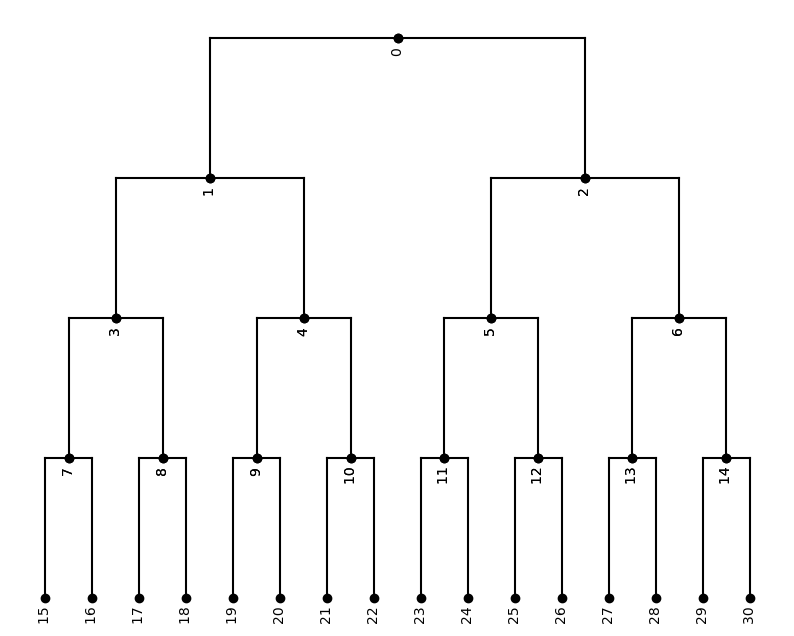

In [10]:

topology = hyperiax.tree.topology.symmetric_topology(4,2)
tree = HypTree(topology)



for i,node in enumerate(tree.iter_topology_bfs()):
    node.name = str(i)
    # alternatively the below will yield the same result but save an enumeration
    # node.name = node.id 


plot_tree(tree,inc_names=True)


# Add branch length 
Lets say we now want to set the `edge_length` to be a function of the node depth. Lets for the sake of example some decaying exponential such that nodes closer to the leaves have shorter edge lengths. 

Each tree calculates the depth of each node, so we can use that here. It is simply a jax array that holds a single integer for each corresponding node. This array is stored in the same order as the rest of the data in the tree, so we are free to do computation on this and assign it to any data slot

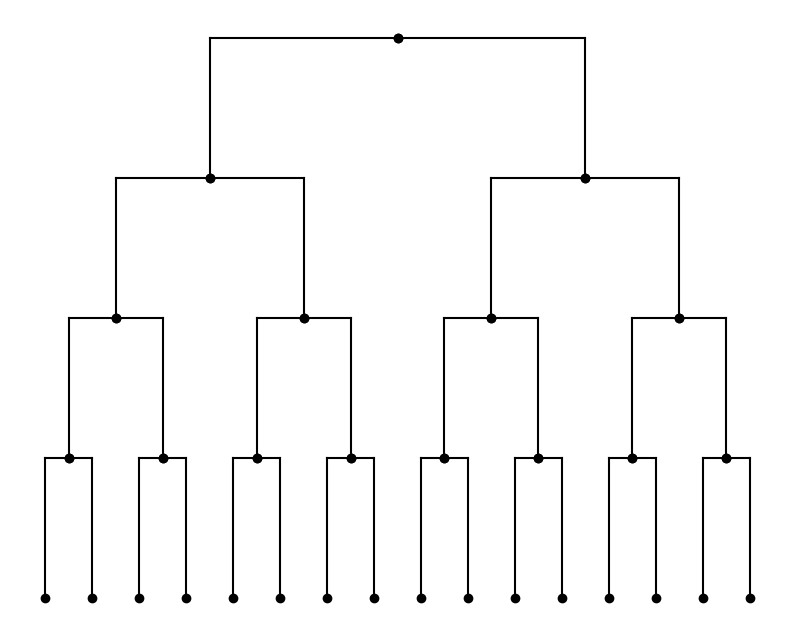

In [11]:

topology = hyperiax.tree.topology.symmetric_topology(4,2)
tree = HypTree(topology)

tree.add_property('edge_length', shape=(1,))
tree.data['edge_length'] = jnp.exp(-jnp.log(2)*tree.node_depths)

plot_tree(tree)

# Tree reader
it is also possible to read a tree from a newick file.


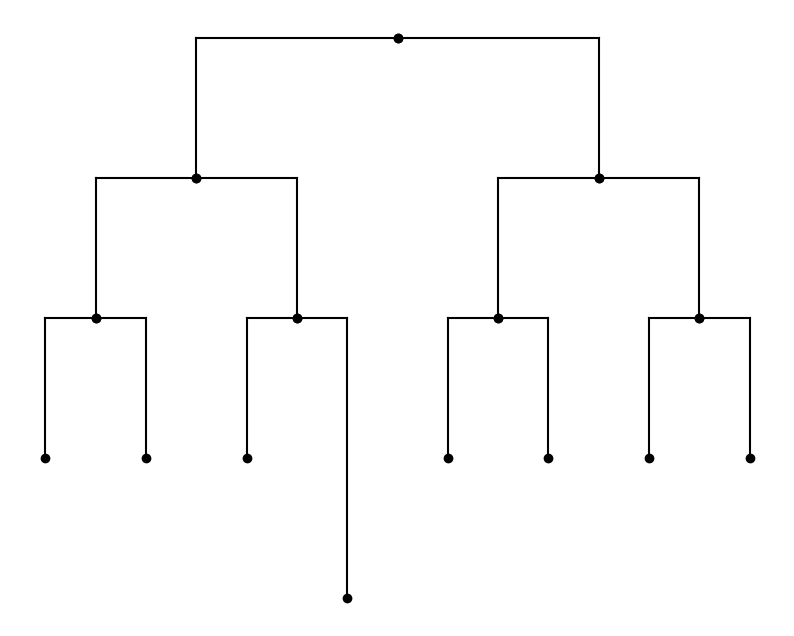

In [14]:
tree = read_tree("(((:1,:1),(:1,:2)),((:1,:1),(:1,:1)));")
plot_tree(tree)

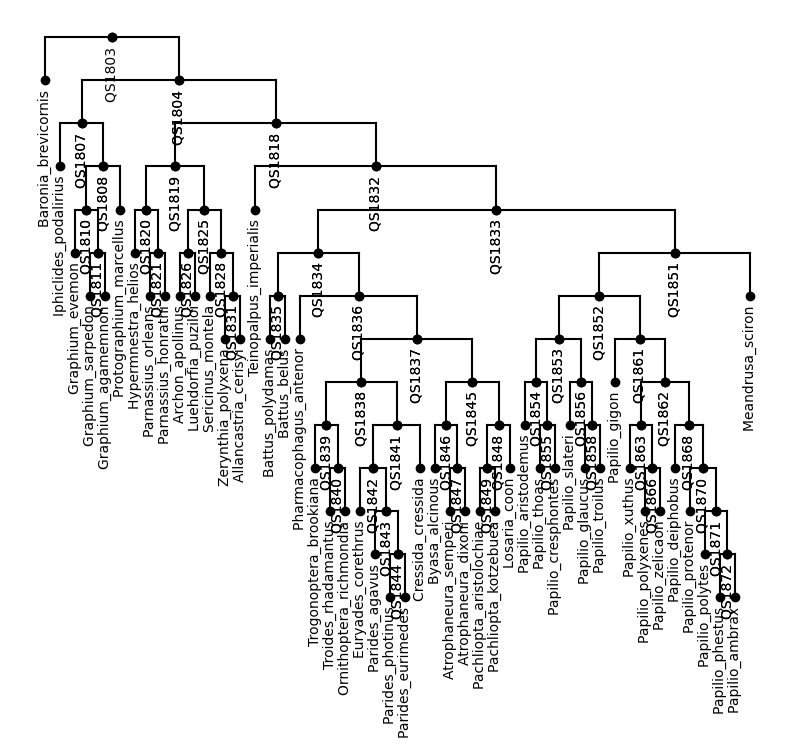

In [26]:
#Smaller subset of the tree from Kawahara 2023 (DOI: 10.1038/s41559-023-02041-9),
string_tree = "(Baronia_brevicornis:0.1711,((Iphiclides_podalirius:0.08472,((Graphium_evemon:0.06883,(Graphium_sarpedon:0.05466,Graphium_agamemnon:0.05188)QS1811:0.01369)QS1810:0.06096,Protographium_marcellus:0.09227)QS1808:0.01315)QS1807:0.0653,(((Hypermnestra_helios:0.04444,(Parnassius_orleans:0.01792,Parnassius_honrathi:0.03123)QS1821:0.0276)QS1820:0.06041,((Archon_apollinus:0.03581,Luehdorfia_puziloi:0.03646)QS1826:0.03388,(Sericinus_montela:0.08969,(Zerynthia_polyxena:0.02408,Allancastria_cerisyi:0.02345)QS1831:0.03039)QS1828:0.03093)QS1825:0.01972)QS1819:0.02572,(Teinopalpus_imperialis:0.09583,(((Battus_polydamas:0.0359,Battus_belus:0.04337)QS1835:0.08774,(Pharmacophagus_antenor:0.07956,(((Trogonoptera_brookiana:0.03698,(Troides_rhadamantus:0.02074,Ornithoptera_richmondia:0.01965)QS1840:0.02241)QS1839:0.00805,((Euryades_corethrus:0.04833,(Parides_agavus:0.03072,(Parides_photinus:0.02647,Parides_eurimedes:0.02819)QS1844:0.0108)QS1843:0.01245)QS1842:0.00564,Cressida_cressida:0.07354)QS1841:0.01338)QS1838:0.00944,((Byasa_alcinous:0.02248,(Atrophaneura_semperi:0.01043,Atrophaneura_dixoni:0.01171)QS1847:0.0129)QS1846:0.01879,((Pachliopta_aristolochiae:0.00348,Pachliopta_kotzebuea:0.00499)QS1849:0.0278,Losaria_coon:0.02297)QS1848:0.02356)QS1845:0.00935)QS1837:0.03434)QS1836:0.03812)QS1834:0.03412,((((Papilio_aristodemus:0.03095,(Papilio_thoas:0.00907,Papilio_cresphontes:0.00884)QS1855:0.02664)QS1854:0.03683,(Papilio_slateri:0.03379,(Papilio_glaucus:0.03012,Papilio_troilus:0.03835)QS1858:0.0096)QS1856:0.01012)QS1853:0.00628,(Papilio_gigon:0.06457,((Papilio_xuthus:0.03532,(Papilio_polyxenes:0.00579,Papilio_zelicaon:0.00541)QS1866:0.02599)QS1863:0.01789,(Papilio_deiphobus:0.02135,(Papilio_protenor:0.01221,(Papilio_polytes:0.01127,(Papilio_phestus:0.00377,Papilio_ambrax:0.00325)QS1872:0.00893)QS1871:0.00991)QS1870:0.007)QS1868:0.03981)QS1862:0.00747)QS1861:0.04588)QS1852:0.05955,Meandrusa_sciron:0.09096)QS1851:0.02719)QS1833:0.01405)QS1832:0.01719)QS1818:0.02038)QS1804:0.04527)QS1803:0;"
tree = read_tree(string_tree)
plot_tree(tree,inc_names=True)